In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Regresi Linear
---

Regresi linear merupakan model yang memodelkan hubungan antara satu atau lebih variabel independen (prediktor) dan variabel dependen (respon) dengan garis lurus.
Model regresi linear dapat dituliskan sebagai berikut.
$$\hat{Y} = \hat{\beta}_0 + X_1 \hat{\beta_1} + X_2 \hat{\beta}_2 + \dots + X_d \hat{\beta}_d$$
dengan $\hat{Y}$ sebagai hasil prediksi, $X$ merupakan vektor variabel prediktor $d$ merupakan banyaknya dimensi dari variabel prediktor, $\beta$ sebagai koefisien, $\beta_0$ sebagai intercept/bias.

Model tersebut dapat dituliskan dalam notasi sigma sebagai berikut.
$$\hat{Y} = \hat{\beta}_0 + \sum_{i=1}^{d} X_i \hat{\beta}_i$$

Atau juga dapat dituliskan dalam notasi matriks sebagai berikut
$$\hat{Y} = \hat{\beta}_0 + X^T\hat{\beta}$$
dimana $X$ dianggap sebagai sebuah matriks berukuran $d \times 1$.

Supaya dapat lebih sederhana dan dapat dituliskan seluruhnya dalam notasi matriks, tambahkan elemen 1 pada elemen pertama matriks $X$ sehingga dapat dituliskan sebagai berikut.
$$\hat{Y} = X^T\hat{\beta}$$
dengan $X$ berukuran $(d+1) \times 1$

Selanjutnya, untuk melakukkan fitting pada data, dapat digunakan metode Least Square dengan mencari nilai Sum of Squared Error terkecil dengan persamaan sebagai berikut.
$$\begin{align*}
SSE &= \sum_{i=1}^{N} (y_i - f(i))^2\\
&= \sum_{i=1}^{N} (y_i - {x_i}^T\beta)^2\\
&= (\textbf{y}-X\beta)^T(\textbf{y}-X\beta)\\
&= (\textbf{y}^T-(X\beta)^T)(\textbf{y}-X\beta)\\
&= \textbf{y}^T \textbf{y} - \textbf{y}^T X \beta - (X\beta)^T \textbf{y} + (X\beta)^T X \beta\\
&= \textbf{y}^T \textbf{y} - \textbf{y}^T X \beta - \beta^T X^T \textbf{y} + \beta^T X^T X \beta\\
\end{align*}$$
Jika dilihat dari dimensinya, $\textbf{y}^T$ memiliki ukuran $(1 \times N)$, $X$ memiliki ukuran $(N \times (d+1))$, dan $\beta$ memiliki ukuran $((d+1) \times 1)$, maka $\textbf{y}^T X \beta$ memiliki ukuran $(1 \times 1)$, yang mana sudah pasti merupakan matriks simetris, maka

$\textbf{y}^T X \beta = (\textbf{y}^T X \beta)^T = \beta^T X^T y$.

$$\begin{align*}
SSE &= \textbf{y}^T \textbf{y} - 2\beta^T X^T \textbf{y} + \beta^T X^T X \beta\\
\end{align*}$$
Turunkan persamaan SSE tersebut terhadap variabel $\beta$ sama dengankan 0 dan cari nilai dari $\beta$
$$\begin{align*}
\frac{\partial(SSE)}{\partial\beta} &= \frac{\partial(\textbf{y}^T \textbf{y} - 2\beta^T X^T \textbf{y} + \beta^T X^T X \beta)}
{\partial\beta}\\
&= -2X^T\textbf{y} + 2 X^T X \beta
\end{align*}$$
Note: turunan dari $\beta^T X^T X \beta$ didapatkan dari teorema yang menyatakan bahwa $\frac{\partial (x^T \textbf{A} x)}{\partial x} = 2\textbf{A}x$, dengan $\textbf{A}$ merupakan matriks simetris.
$$\begin{align*}
-2X^T\textbf{y} + 2 X^T X \beta &= 0\\
X^T X \beta &= X^T \textbf{y}\\
\beta &= (X^T X)^{-1} X^T \textbf{y}
\end{align*}$$

In [3]:
class LinearRegression:
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return X @ self.beta

In [4]:
X = np.array([[20*random.random()] for _ in range(25)])
y = np.array([[3*x[0] + 15*(0.5-random.random())] for x in X])

In [5]:
model = LinearRegression()
model.fit(X, y)

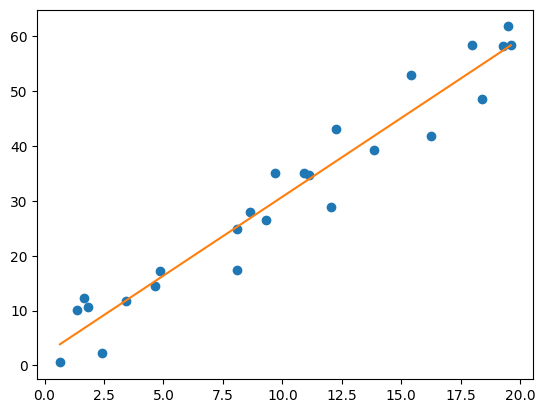

In [6]:
plt.plot(X, y, 'o')
plt.plot([min(X)[0], max(X)[0]], [model.predict([[min(X)[0]]])[0], model.predict([[max(X)[0]]])[0]])

In [7]:
model.beta

array([[1.97684458],
       [2.87620719]])

In [8]:
with open('00 Data.npy', 'rb') as f:
    X_1 = np.load(f)
    y_1 = np.load(f)
    X_2 = np.load(f)
    y_2 = np.load(f)
    X = np.load(f)
    y = np.load(f)

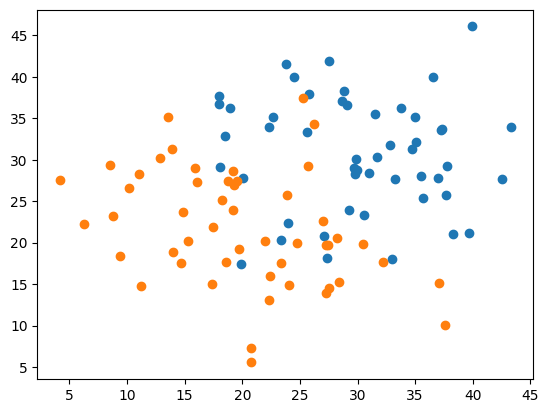

In [34]:
plt.plot(X_1, y_1, 'o')
plt.plot(X_2, y_2, 'o')

In [35]:
model.fit(X, y)

In [36]:
predicted_orange, predicted_blue = [[], []], [[], []]

for i in range(50):
    for j in range(50):
        if model.predict([[i, j]])[0] < 0.5:
            predicted_blue[0] += [i]
            predicted_blue[1] += [j]
        else:
            predicted_orange[0] += [i]
            predicted_orange[1] += [j]

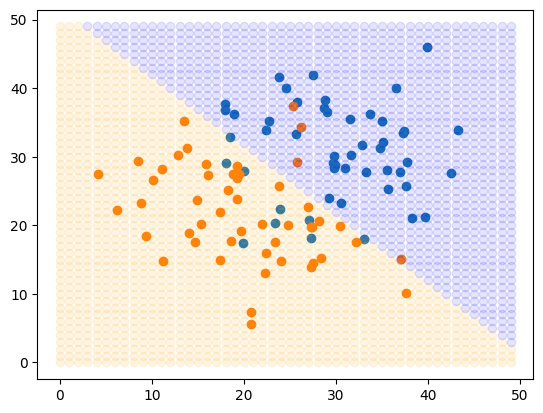

In [37]:
plt.plot(X_1, y_1, 'o')
plt.plot(X_2, y_2, 'o')
plt.plot(predicted_orange[0], predicted_orange[1], 'o', alpha=0.1, color='orange')
plt.plot(predicted_blue[0], predicted_blue[1], 'o', alpha=0.1, color='blue')